# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

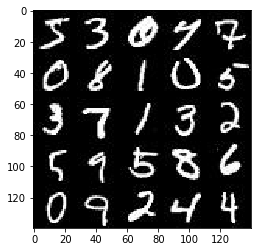

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

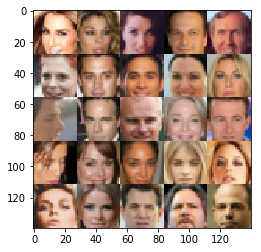

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels])
    z_input = tf.placeholder(tf.float32, [None, z_dim], name='z_input')
    learning_rate = tf.placeholder(tf.float32)
    return input_real, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        hid1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        hid1 = tf.maximum(alpha * hid1, hid1)
        
        hid2 = tf.layers.conv2d(hid1, 128, 5, 2, 'same')
        hid2 = tf.layers.batch_normalization(hid2, training = True)
        hid2 = tf.maximum(alpha * hid2, hid2)
        
        hid3 = tf.layers.conv2d(hid2, 256, 5, 2, 'same')
        hid3 = tf.layers.batch_normalization(hid3, training = True)
        hid3 = tf.maximum(alpha * hid3, hid3)
        
        flat = tf.reshape(hid3, (-1,4*4*256))
        logits = tf.layers.dense(flat,1)
        output = tf.sigmoid(logits)
        
        
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [17]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse = not is_train):        
        
        alpha = 0.2
    
        hid1 = tf.layers.dense(z, 2*2*512)
        hid1 = tf.reshape(hid1, (-1, 2, 2, 512))
        hid1 = tf.layers.batch_normalization(hid1, training=is_train)
        hid1 = tf.maximum(alpha * hid1, hid1)
    
        hid2 = tf.layers.conv2d_transpose(hid1, 256, 5, 2, 'valid')
        hid2 = tf.layers.batch_normalization(hid2, training=is_train)
        hid2 = tf.maximum(alpha * hid2, hid2)
    
        hid3 = tf.layers.conv2d_transpose(hid2, 128, 5, 2, 'same')
        hid3 = tf.layers.batch_normalization(hid3, training=is_train)
        hid3 = tf.maximum(alpha * hid3, hid3)
    
        logits = tf.layers.conv2d_transpose(hid3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [18]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    gen_model = generator(input_z, out_channel_dim)
    
    dis_model_real, dis_logits_real = discriminator(input_real)
    dis_model_fake, dis_logits_fake = discriminator(gen_model, reuse=True)
    
    dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real, 
                                                            labels=tf.ones_like(dis_model_real)))
    dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake,
                                                            labels=tf.zeros_like(dis_model_fake)))
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, 
                                                            labels=tf.ones_like(dis_model_fake)))
    
    dis_loss = dis_loss_real + dis_loss_fake
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [23]:
def model_opt(dis_loss, gen_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_vars = tf.trainable_variables()
    dis_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    dis_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(dis_loss, var_list=dis_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(gen_updates):
        gen_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(gen_loss, var_list=gen_vars)
    return dis_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [24]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [25]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.2925... Generator Loss: 3.4094
Epoch 1/2... Discriminator Loss: 2.1826... Generator Loss: 14.0918
Epoch 1/2... Discriminator Loss: 0.2763... Generator Loss: 2.1796
Epoch 1/2... Discriminator Loss: 0.3017... Generator Loss: 4.1587
Epoch 1/2... Discriminator Loss: 0.5198... Generator Loss: 2.1090
Epoch 1/2... Discriminator Loss: 0.1255... Generator Loss: 2.8886
Epoch 1/2... Discriminator Loss: 0.8726... Generator Loss: 4.1486
Epoch 1/2... Discriminator Loss: 0.5449... Generator Loss: 1.3018
Epoch 1/2... Discriminator Loss: 0.5468... Generator Loss: 3.8670
Epoch 1/2... Discriminator Loss: 0.1931... Generator Loss: 2.9844


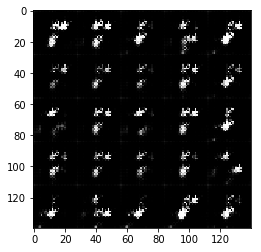

Epoch 1/2... Discriminator Loss: 0.4457... Generator Loss: 1.6881
Epoch 1/2... Discriminator Loss: 0.3530... Generator Loss: 2.1813
Epoch 1/2... Discriminator Loss: 0.3973... Generator Loss: 2.1257
Epoch 1/2... Discriminator Loss: 0.1173... Generator Loss: 4.1104
Epoch 1/2... Discriminator Loss: 0.7337... Generator Loss: 4.6025
Epoch 1/2... Discriminator Loss: 0.6861... Generator Loss: 2.6505
Epoch 1/2... Discriminator Loss: 0.6574... Generator Loss: 1.3539
Epoch 1/2... Discriminator Loss: 0.6474... Generator Loss: 3.2996
Epoch 1/2... Discriminator Loss: 0.7597... Generator Loss: 1.1515
Epoch 1/2... Discriminator Loss: 1.0324... Generator Loss: 8.2809


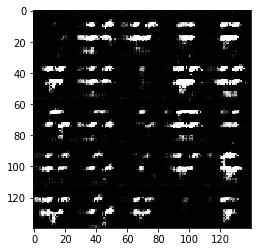

Epoch 1/2... Discriminator Loss: 0.5445... Generator Loss: 4.6642
Epoch 1/2... Discriminator Loss: 0.3902... Generator Loss: 2.4685
Epoch 1/2... Discriminator Loss: 0.4757... Generator Loss: 1.6055
Epoch 1/2... Discriminator Loss: 1.0660... Generator Loss: 5.0183
Epoch 1/2... Discriminator Loss: 0.7627... Generator Loss: 1.0322
Epoch 1/2... Discriminator Loss: 0.9239... Generator Loss: 1.4537
Epoch 1/2... Discriminator Loss: 0.4878... Generator Loss: 2.5944
Epoch 1/2... Discriminator Loss: 1.7766... Generator Loss: 0.4650
Epoch 1/2... Discriminator Loss: 0.3924... Generator Loss: 2.1343
Epoch 1/2... Discriminator Loss: 0.4066... Generator Loss: 2.5931


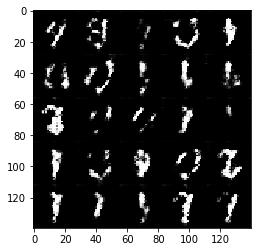

Epoch 1/2... Discriminator Loss: 0.2987... Generator Loss: 4.1792
Epoch 1/2... Discriminator Loss: 1.6892... Generator Loss: 0.5271
Epoch 1/2... Discriminator Loss: 1.0212... Generator Loss: 1.5107
Epoch 1/2... Discriminator Loss: 0.9427... Generator Loss: 3.7762
Epoch 1/2... Discriminator Loss: 0.4973... Generator Loss: 2.3454
Epoch 1/2... Discriminator Loss: 1.0215... Generator Loss: 0.8577
Epoch 1/2... Discriminator Loss: 1.5085... Generator Loss: 1.9044
Epoch 1/2... Discriminator Loss: 0.6594... Generator Loss: 3.5553
Epoch 1/2... Discriminator Loss: 0.8076... Generator Loss: 1.1906
Epoch 1/2... Discriminator Loss: 1.4551... Generator Loss: 0.4937


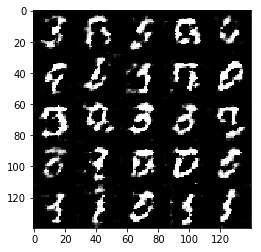

Epoch 1/2... Discriminator Loss: 1.0989... Generator Loss: 0.6898
Epoch 1/2... Discriminator Loss: 0.6173... Generator Loss: 2.3571
Epoch 1/2... Discriminator Loss: 0.8256... Generator Loss: 1.3245
Epoch 1/2... Discriminator Loss: 0.9338... Generator Loss: 0.9001
Epoch 1/2... Discriminator Loss: 0.8194... Generator Loss: 1.4613
Epoch 1/2... Discriminator Loss: 0.5916... Generator Loss: 1.9561
Epoch 1/2... Discriminator Loss: 1.1723... Generator Loss: 1.3502
Epoch 1/2... Discriminator Loss: 0.3563... Generator Loss: 2.2249
Epoch 1/2... Discriminator Loss: 1.3049... Generator Loss: 0.6852
Epoch 1/2... Discriminator Loss: 1.1091... Generator Loss: 3.0189


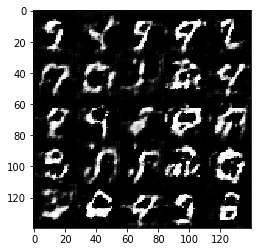

Epoch 1/2... Discriminator Loss: 0.8650... Generator Loss: 2.0458
Epoch 1/2... Discriminator Loss: 0.9969... Generator Loss: 0.7493
Epoch 1/2... Discriminator Loss: 1.1977... Generator Loss: 2.3082
Epoch 1/2... Discriminator Loss: 0.7249... Generator Loss: 1.4958
Epoch 1/2... Discriminator Loss: 0.6850... Generator Loss: 1.8075
Epoch 1/2... Discriminator Loss: 0.9430... Generator Loss: 0.8699
Epoch 1/2... Discriminator Loss: 0.7513... Generator Loss: 1.5355
Epoch 1/2... Discriminator Loss: 1.2898... Generator Loss: 0.6445
Epoch 1/2... Discriminator Loss: 0.5499... Generator Loss: 1.4302
Epoch 1/2... Discriminator Loss: 0.6873... Generator Loss: 1.4838


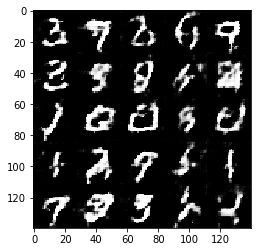

Epoch 1/2... Discriminator Loss: 0.9003... Generator Loss: 1.2306
Epoch 1/2... Discriminator Loss: 0.6699... Generator Loss: 1.4385
Epoch 1/2... Discriminator Loss: 0.5329... Generator Loss: 1.9974
Epoch 1/2... Discriminator Loss: 0.7218... Generator Loss: 1.5448
Epoch 1/2... Discriminator Loss: 1.1293... Generator Loss: 2.8917
Epoch 1/2... Discriminator Loss: 0.7765... Generator Loss: 1.9075
Epoch 1/2... Discriminator Loss: 0.5356... Generator Loss: 1.7446
Epoch 1/2... Discriminator Loss: 1.2757... Generator Loss: 0.6132
Epoch 1/2... Discriminator Loss: 0.6274... Generator Loss: 2.4756
Epoch 1/2... Discriminator Loss: 0.8764... Generator Loss: 1.6304


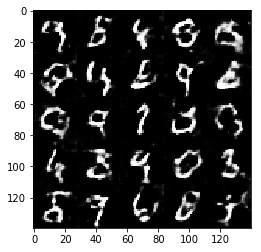

Epoch 1/2... Discriminator Loss: 1.6541... Generator Loss: 0.3757
Epoch 1/2... Discriminator Loss: 1.0676... Generator Loss: 0.9163
Epoch 1/2... Discriminator Loss: 0.8124... Generator Loss: 1.8829
Epoch 1/2... Discriminator Loss: 0.6911... Generator Loss: 1.1486
Epoch 1/2... Discriminator Loss: 1.0445... Generator Loss: 0.6534
Epoch 1/2... Discriminator Loss: 0.7534... Generator Loss: 1.0321
Epoch 1/2... Discriminator Loss: 0.6915... Generator Loss: 1.4072
Epoch 1/2... Discriminator Loss: 1.1576... Generator Loss: 2.3871
Epoch 1/2... Discriminator Loss: 1.9361... Generator Loss: 0.2531
Epoch 1/2... Discriminator Loss: 1.6620... Generator Loss: 0.3168


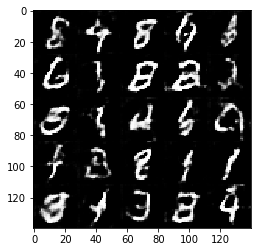

Epoch 1/2... Discriminator Loss: 1.2019... Generator Loss: 0.6638
Epoch 1/2... Discriminator Loss: 0.9670... Generator Loss: 0.8968
Epoch 1/2... Discriminator Loss: 0.8941... Generator Loss: 0.9903
Epoch 1/2... Discriminator Loss: 0.6743... Generator Loss: 1.9671
Epoch 1/2... Discriminator Loss: 0.5415... Generator Loss: 1.5586
Epoch 1/2... Discriminator Loss: 0.9490... Generator Loss: 1.0222
Epoch 1/2... Discriminator Loss: 1.2762... Generator Loss: 1.1891
Epoch 1/2... Discriminator Loss: 0.9462... Generator Loss: 0.6600
Epoch 1/2... Discriminator Loss: 0.6488... Generator Loss: 1.4956
Epoch 1/2... Discriminator Loss: 0.8707... Generator Loss: 0.9051


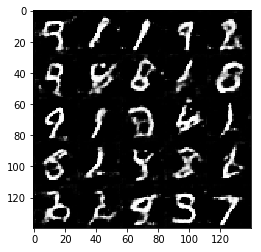

Epoch 1/2... Discriminator Loss: 1.2966... Generator Loss: 2.9525
Epoch 1/2... Discriminator Loss: 0.8314... Generator Loss: 1.3264
Epoch 1/2... Discriminator Loss: 0.8314... Generator Loss: 0.9112
Epoch 2/2... Discriminator Loss: 1.0084... Generator Loss: 2.7292
Epoch 2/2... Discriminator Loss: 0.6648... Generator Loss: 1.2738
Epoch 2/2... Discriminator Loss: 0.9018... Generator Loss: 0.8553
Epoch 2/2... Discriminator Loss: 0.8034... Generator Loss: 1.1155
Epoch 2/2... Discriminator Loss: 1.9554... Generator Loss: 0.2636
Epoch 2/2... Discriminator Loss: 1.0251... Generator Loss: 1.4044
Epoch 2/2... Discriminator Loss: 0.8359... Generator Loss: 1.3502


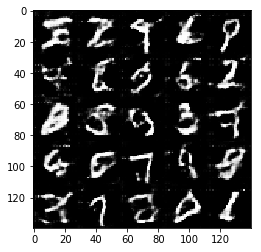

Epoch 2/2... Discriminator Loss: 0.9367... Generator Loss: 1.4789
Epoch 2/2... Discriminator Loss: 0.7377... Generator Loss: 1.4743
Epoch 2/2... Discriminator Loss: 0.5991... Generator Loss: 1.2911
Epoch 2/2... Discriminator Loss: 1.1071... Generator Loss: 0.6497
Epoch 2/2... Discriminator Loss: 1.1641... Generator Loss: 0.6934
Epoch 2/2... Discriminator Loss: 0.8602... Generator Loss: 0.8469
Epoch 2/2... Discriminator Loss: 0.8436... Generator Loss: 0.8561
Epoch 2/2... Discriminator Loss: 1.8042... Generator Loss: 2.5691
Epoch 2/2... Discriminator Loss: 0.9855... Generator Loss: 0.7537
Epoch 2/2... Discriminator Loss: 1.3690... Generator Loss: 0.4591


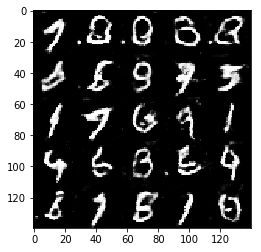

Epoch 2/2... Discriminator Loss: 0.6938... Generator Loss: 1.4706
Epoch 2/2... Discriminator Loss: 0.6005... Generator Loss: 1.4964
Epoch 2/2... Discriminator Loss: 0.5606... Generator Loss: 2.1709
Epoch 2/2... Discriminator Loss: 0.6457... Generator Loss: 1.2870
Epoch 2/2... Discriminator Loss: 1.9796... Generator Loss: 0.2426
Epoch 2/2... Discriminator Loss: 0.8128... Generator Loss: 1.9250
Epoch 2/2... Discriminator Loss: 0.9546... Generator Loss: 0.7879
Epoch 2/2... Discriminator Loss: 2.0029... Generator Loss: 0.3112
Epoch 2/2... Discriminator Loss: 1.0652... Generator Loss: 0.9348
Epoch 2/2... Discriminator Loss: 1.0487... Generator Loss: 0.8440


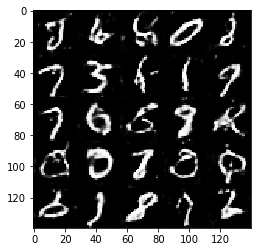

Epoch 2/2... Discriminator Loss: 1.0284... Generator Loss: 0.9265
Epoch 2/2... Discriminator Loss: 0.9080... Generator Loss: 1.1016
Epoch 2/2... Discriminator Loss: 0.8271... Generator Loss: 1.3685
Epoch 2/2... Discriminator Loss: 0.8124... Generator Loss: 1.0322
Epoch 2/2... Discriminator Loss: 1.0909... Generator Loss: 2.3126
Epoch 2/2... Discriminator Loss: 0.9398... Generator Loss: 0.9957
Epoch 2/2... Discriminator Loss: 1.4487... Generator Loss: 0.4029
Epoch 2/2... Discriminator Loss: 0.8712... Generator Loss: 1.0224
Epoch 2/2... Discriminator Loss: 1.3611... Generator Loss: 0.5343
Epoch 2/2... Discriminator Loss: 0.8159... Generator Loss: 2.2267


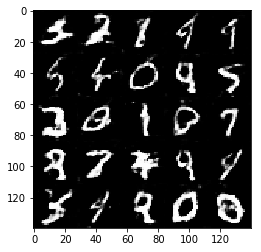

Epoch 2/2... Discriminator Loss: 0.9457... Generator Loss: 0.9385
Epoch 2/2... Discriminator Loss: 0.9772... Generator Loss: 1.2555
Epoch 2/2... Discriminator Loss: 2.2270... Generator Loss: 0.1884
Epoch 2/2... Discriminator Loss: 0.8208... Generator Loss: 1.0768
Epoch 2/2... Discriminator Loss: 1.0000... Generator Loss: 1.0635
Epoch 2/2... Discriminator Loss: 1.0411... Generator Loss: 0.6924
Epoch 2/2... Discriminator Loss: 1.4007... Generator Loss: 0.4844
Epoch 2/2... Discriminator Loss: 1.1445... Generator Loss: 0.6186
Epoch 2/2... Discriminator Loss: 0.9143... Generator Loss: 4.1526
Epoch 2/2... Discriminator Loss: 1.2246... Generator Loss: 1.4685


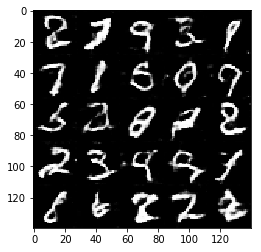

Epoch 2/2... Discriminator Loss: 1.3871... Generator Loss: 0.4798
Epoch 2/2... Discriminator Loss: 1.2408... Generator Loss: 0.4995
Epoch 2/2... Discriminator Loss: 0.9695... Generator Loss: 1.1844
Epoch 2/2... Discriminator Loss: 2.0021... Generator Loss: 0.2442
Epoch 2/2... Discriminator Loss: 0.8090... Generator Loss: 1.6239
Epoch 2/2... Discriminator Loss: 1.9532... Generator Loss: 0.3256
Epoch 2/2... Discriminator Loss: 0.8088... Generator Loss: 1.7508
Epoch 2/2... Discriminator Loss: 0.6201... Generator Loss: 1.2116
Epoch 2/2... Discriminator Loss: 0.9032... Generator Loss: 1.6170
Epoch 2/2... Discriminator Loss: 0.6499... Generator Loss: 1.8981


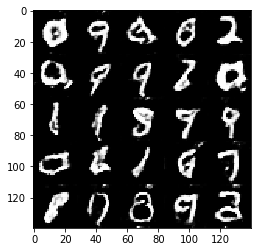

Epoch 2/2... Discriminator Loss: 0.8547... Generator Loss: 0.7970
Epoch 2/2... Discriminator Loss: 1.9258... Generator Loss: 0.2643
Epoch 2/2... Discriminator Loss: 0.4593... Generator Loss: 1.3849
Epoch 2/2... Discriminator Loss: 0.4148... Generator Loss: 1.9348
Epoch 2/2... Discriminator Loss: 1.0245... Generator Loss: 0.8143
Epoch 2/2... Discriminator Loss: 0.7305... Generator Loss: 1.6302
Epoch 2/2... Discriminator Loss: 1.1317... Generator Loss: 0.6972
Epoch 2/2... Discriminator Loss: 0.8733... Generator Loss: 0.9297
Epoch 2/2... Discriminator Loss: 0.7361... Generator Loss: 1.4313
Epoch 2/2... Discriminator Loss: 0.8080... Generator Loss: 0.9855


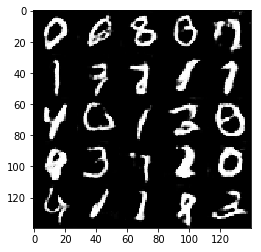

Epoch 2/2... Discriminator Loss: 0.8467... Generator Loss: 1.4430
Epoch 2/2... Discriminator Loss: 0.8557... Generator Loss: 1.2270
Epoch 2/2... Discriminator Loss: 0.8128... Generator Loss: 0.9487
Epoch 2/2... Discriminator Loss: 1.2492... Generator Loss: 0.5046
Epoch 2/2... Discriminator Loss: 0.8329... Generator Loss: 0.8458
Epoch 2/2... Discriminator Loss: 0.5965... Generator Loss: 1.9144
Epoch 2/2... Discriminator Loss: 0.8406... Generator Loss: 1.0102
Epoch 2/2... Discriminator Loss: 0.4485... Generator Loss: 1.8514
Epoch 2/2... Discriminator Loss: 0.5084... Generator Loss: 1.5846
Epoch 2/2... Discriminator Loss: 1.9029... Generator Loss: 0.2868


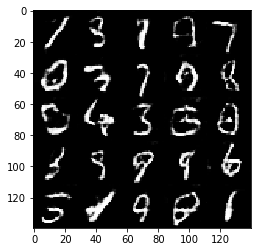

Epoch 2/2... Discriminator Loss: 0.6877... Generator Loss: 1.6412
Epoch 2/2... Discriminator Loss: 1.1369... Generator Loss: 0.5896
Epoch 2/2... Discriminator Loss: 1.8278... Generator Loss: 0.4181
Epoch 2/2... Discriminator Loss: 0.8646... Generator Loss: 1.0155
Epoch 2/2... Discriminator Loss: 0.5434... Generator Loss: 2.8121
Epoch 2/2... Discriminator Loss: 1.0553... Generator Loss: 2.2699
Epoch 2/2... Discriminator Loss: 0.7369... Generator Loss: 1.5587
Epoch 2/2... Discriminator Loss: 0.9908... Generator Loss: 1.0486
Epoch 2/2... Discriminator Loss: 0.6715... Generator Loss: 1.2197
Epoch 2/2... Discriminator Loss: 1.5197... Generator Loss: 0.5700


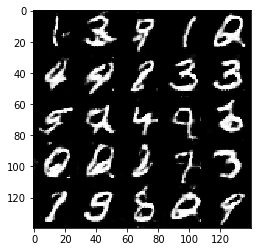

Epoch 2/2... Discriminator Loss: 0.9086... Generator Loss: 1.1901
Epoch 2/2... Discriminator Loss: 1.3978... Generator Loss: 0.4922
Epoch 2/2... Discriminator Loss: 1.1360... Generator Loss: 0.6301
Epoch 2/2... Discriminator Loss: 0.7764... Generator Loss: 1.3937
Epoch 2/2... Discriminator Loss: 1.5530... Generator Loss: 2.8062
Epoch 2/2... Discriminator Loss: 0.8368... Generator Loss: 1.3660
Epoch 2/2... Discriminator Loss: 0.7894... Generator Loss: 1.1104


In [27]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4256... Generator Loss: 5.9108
Epoch 1/1... Discriminator Loss: 0.4402... Generator Loss: 2.5619
Epoch 1/1... Discriminator Loss: 3.0016... Generator Loss: 0.8771
Epoch 1/1... Discriminator Loss: 0.2497... Generator Loss: 7.5768
Epoch 1/1... Discriminator Loss: 0.5045... Generator Loss: 2.2499
Epoch 1/1... Discriminator Loss: 0.4163... Generator Loss: 9.4665
Epoch 1/1... Discriminator Loss: 0.5937... Generator Loss: 1.5162
Epoch 1/1... Discriminator Loss: 0.5491... Generator Loss: 5.7577
Epoch 1/1... Discriminator Loss: 0.5023... Generator Loss: 1.4515
Epoch 1/1... Discriminator Loss: 0.2615... Generator Loss: 2.8307


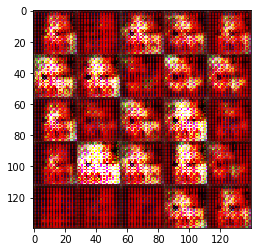

Epoch 1/1... Discriminator Loss: 0.2157... Generator Loss: 2.4509
Epoch 1/1... Discriminator Loss: 1.2329... Generator Loss: 0.8811
Epoch 1/1... Discriminator Loss: 0.5513... Generator Loss: 1.1514
Epoch 1/1... Discriminator Loss: 0.1383... Generator Loss: 3.1433
Epoch 1/1... Discriminator Loss: 1.3261... Generator Loss: 0.5452
Epoch 1/1... Discriminator Loss: 0.6291... Generator Loss: 1.1990
Epoch 1/1... Discriminator Loss: 3.0157... Generator Loss: 0.1298
Epoch 1/1... Discriminator Loss: 0.6924... Generator Loss: 0.9569
Epoch 1/1... Discriminator Loss: 0.1274... Generator Loss: 2.7356
Epoch 1/1... Discriminator Loss: 0.8630... Generator Loss: 5.7202


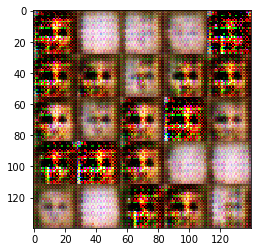

Epoch 1/1... Discriminator Loss: 0.0480... Generator Loss: 4.3939
Epoch 1/1... Discriminator Loss: 0.6969... Generator Loss: 2.6304
Epoch 1/1... Discriminator Loss: 0.0628... Generator Loss: 3.3484
Epoch 1/1... Discriminator Loss: 0.2111... Generator Loss: 1.9371
Epoch 1/1... Discriminator Loss: 0.1817... Generator Loss: 2.5713
Epoch 1/1... Discriminator Loss: 0.7346... Generator Loss: 7.1210
Epoch 1/1... Discriminator Loss: 0.3521... Generator Loss: 3.3630
Epoch 1/1... Discriminator Loss: 0.7457... Generator Loss: 2.7637
Epoch 1/1... Discriminator Loss: 1.7255... Generator Loss: 0.4998
Epoch 1/1... Discriminator Loss: 1.1849... Generator Loss: 0.5080


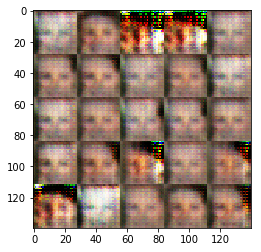

Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 0.7496
Epoch 1/1... Discriminator Loss: 0.7456... Generator Loss: 1.7259
Epoch 1/1... Discriminator Loss: 0.6669... Generator Loss: 1.6036
Epoch 1/1... Discriminator Loss: 2.5494... Generator Loss: 5.1782
Epoch 1/1... Discriminator Loss: 1.9934... Generator Loss: 0.9130
Epoch 1/1... Discriminator Loss: 2.1939... Generator Loss: 0.1886
Epoch 1/1... Discriminator Loss: 1.2799... Generator Loss: 0.5337
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 0.8163
Epoch 1/1... Discriminator Loss: 1.9334... Generator Loss: 3.1638
Epoch 1/1... Discriminator Loss: 0.8690... Generator Loss: 2.3341


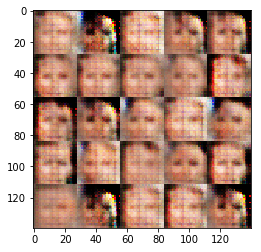

Epoch 1/1... Discriminator Loss: 1.8033... Generator Loss: 0.4172
Epoch 1/1... Discriminator Loss: 0.9660... Generator Loss: 2.0097
Epoch 1/1... Discriminator Loss: 1.0377... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 1.5033... Generator Loss: 2.1318
Epoch 1/1... Discriminator Loss: 0.7742... Generator Loss: 1.0656
Epoch 1/1... Discriminator Loss: 0.9967... Generator Loss: 1.2491
Epoch 1/1... Discriminator Loss: 1.2350... Generator Loss: 1.1839
Epoch 1/1... Discriminator Loss: 0.8245... Generator Loss: 1.2985
Epoch 1/1... Discriminator Loss: 1.5333... Generator Loss: 1.5268
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.9346


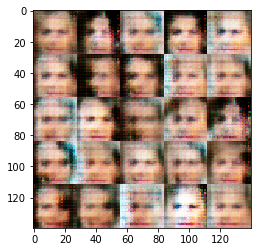

Epoch 1/1... Discriminator Loss: 1.0371... Generator Loss: 0.6769
Epoch 1/1... Discriminator Loss: 0.8557... Generator Loss: 1.3435
Epoch 1/1... Discriminator Loss: 0.9408... Generator Loss: 0.9756
Epoch 1/1... Discriminator Loss: 0.7522... Generator Loss: 1.3296
Epoch 1/1... Discriminator Loss: 1.0410... Generator Loss: 1.0050
Epoch 1/1... Discriminator Loss: 1.5901... Generator Loss: 0.3327
Epoch 1/1... Discriminator Loss: 3.0494... Generator Loss: 3.5876
Epoch 1/1... Discriminator Loss: 0.9072... Generator Loss: 1.2480
Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 0.8359
Epoch 1/1... Discriminator Loss: 0.7288... Generator Loss: 1.3256


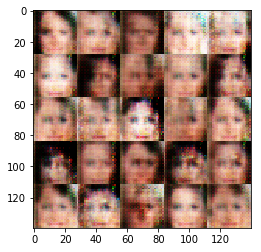

Epoch 1/1... Discriminator Loss: 1.2815... Generator Loss: 0.5379
Epoch 1/1... Discriminator Loss: 1.9910... Generator Loss: 0.2237
Epoch 1/1... Discriminator Loss: 1.1137... Generator Loss: 0.5973
Epoch 1/1... Discriminator Loss: 0.7388... Generator Loss: 0.9918
Epoch 1/1... Discriminator Loss: 1.1373... Generator Loss: 0.8079
Epoch 1/1... Discriminator Loss: 1.1167... Generator Loss: 1.7345
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 0.4699
Epoch 1/1... Discriminator Loss: 1.4224... Generator Loss: 0.4879
Epoch 1/1... Discriminator Loss: 0.9554... Generator Loss: 0.7670
Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 0.6989


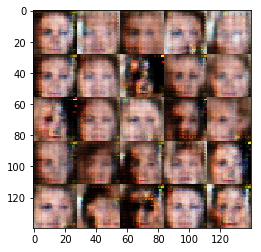

Epoch 1/1... Discriminator Loss: 1.8994... Generator Loss: 3.3862
Epoch 1/1... Discriminator Loss: 1.5406... Generator Loss: 2.6700
Epoch 1/1... Discriminator Loss: 0.6237... Generator Loss: 1.5667
Epoch 1/1... Discriminator Loss: 1.2426... Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 1.6707... Generator Loss: 0.3411
Epoch 1/1... Discriminator Loss: 0.8307... Generator Loss: 0.8836
Epoch 1/1... Discriminator Loss: 1.1529... Generator Loss: 0.9086
Epoch 1/1... Discriminator Loss: 0.8851... Generator Loss: 0.8490
Epoch 1/1... Discriminator Loss: 0.9503... Generator Loss: 1.0859
Epoch 1/1... Discriminator Loss: 0.6476... Generator Loss: 1.5109


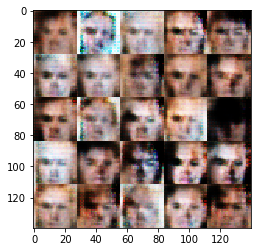

Epoch 1/1... Discriminator Loss: 1.1740... Generator Loss: 0.7093
Epoch 1/1... Discriminator Loss: 0.7624... Generator Loss: 1.1579
Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 0.7370
Epoch 1/1... Discriminator Loss: 2.4568... Generator Loss: 3.6117
Epoch 1/1... Discriminator Loss: 0.8826... Generator Loss: 1.0387
Epoch 1/1... Discriminator Loss: 1.2854... Generator Loss: 0.5418
Epoch 1/1... Discriminator Loss: 1.0813... Generator Loss: 0.9078
Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 0.9098... Generator Loss: 0.9244
Epoch 1/1... Discriminator Loss: 0.7994... Generator Loss: 0.8079


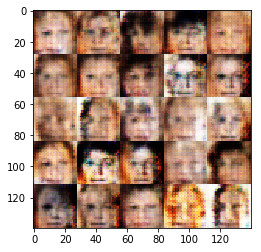

Epoch 1/1... Discriminator Loss: 0.9667... Generator Loss: 1.7332
Epoch 1/1... Discriminator Loss: 0.8952... Generator Loss: 1.1666
Epoch 1/1... Discriminator Loss: 0.9258... Generator Loss: 0.9761
Epoch 1/1... Discriminator Loss: 1.7531... Generator Loss: 2.8665
Epoch 1/1... Discriminator Loss: 1.1338... Generator Loss: 1.5316
Epoch 1/1... Discriminator Loss: 0.9872... Generator Loss: 1.8598
Epoch 1/1... Discriminator Loss: 1.1249... Generator Loss: 1.0278
Epoch 1/1... Discriminator Loss: 0.7794... Generator Loss: 1.1849
Epoch 1/1... Discriminator Loss: 1.7928... Generator Loss: 2.6472
Epoch 1/1... Discriminator Loss: 1.2006... Generator Loss: 2.2727


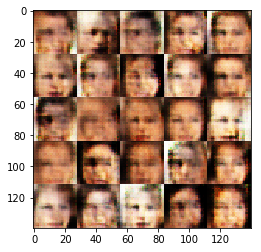

Epoch 1/1... Discriminator Loss: 1.1967... Generator Loss: 1.0588
Epoch 1/1... Discriminator Loss: 0.8268... Generator Loss: 0.9538
Epoch 1/1... Discriminator Loss: 1.5487... Generator Loss: 0.4102
Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 0.4566
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.5048
Epoch 1/1... Discriminator Loss: 1.0463... Generator Loss: 1.0702
Epoch 1/1... Discriminator Loss: 1.0805... Generator Loss: 0.5726
Epoch 1/1... Discriminator Loss: 1.8507... Generator Loss: 3.3566
Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 0.4524
Epoch 1/1... Discriminator Loss: 1.6086... Generator Loss: 0.8972


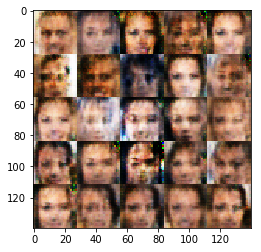

Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 0.7462
Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 0.9574
Epoch 1/1... Discriminator Loss: 0.8184... Generator Loss: 1.4570
Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 0.5131
Epoch 1/1... Discriminator Loss: 1.0274... Generator Loss: 1.4818
Epoch 1/1... Discriminator Loss: 0.7229... Generator Loss: 1.6537
Epoch 1/1... Discriminator Loss: 1.1175... Generator Loss: 0.6793
Epoch 1/1... Discriminator Loss: 1.1431... Generator Loss: 1.5551
Epoch 1/1... Discriminator Loss: 1.8518... Generator Loss: 0.2621
Epoch 1/1... Discriminator Loss: 1.0783... Generator Loss: 1.0635


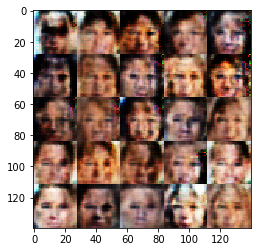

Epoch 1/1... Discriminator Loss: 1.2904... Generator Loss: 0.7197
Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.4478
Epoch 1/1... Discriminator Loss: 1.1380... Generator Loss: 0.7099
Epoch 1/1... Discriminator Loss: 0.7575... Generator Loss: 1.8747
Epoch 1/1... Discriminator Loss: 0.8708... Generator Loss: 0.8599
Epoch 1/1... Discriminator Loss: 1.0171... Generator Loss: 0.7044
Epoch 1/1... Discriminator Loss: 0.9475... Generator Loss: 1.1229
Epoch 1/1... Discriminator Loss: 1.0955... Generator Loss: 0.6727
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 3.7918
Epoch 1/1... Discriminator Loss: 1.4425... Generator Loss: 1.9772


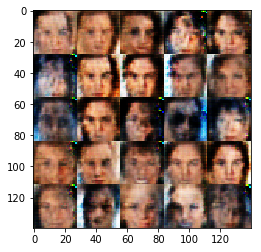

Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.5262
Epoch 1/1... Discriminator Loss: 1.1167... Generator Loss: 1.2613
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 0.5996
Epoch 1/1... Discriminator Loss: 1.3335... Generator Loss: 0.3827
Epoch 1/1... Discriminator Loss: 0.7685... Generator Loss: 1.3561
Epoch 1/1... Discriminator Loss: 0.8805... Generator Loss: 1.0564
Epoch 1/1... Discriminator Loss: 0.9643... Generator Loss: 1.0036
Epoch 1/1... Discriminator Loss: 0.8403... Generator Loss: 1.8279
Epoch 1/1... Discriminator Loss: 0.6891... Generator Loss: 1.1622
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.5180


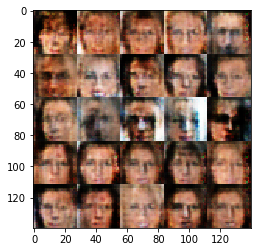

Epoch 1/1... Discriminator Loss: 1.5459... Generator Loss: 0.3591
Epoch 1/1... Discriminator Loss: 1.1517... Generator Loss: 0.8259
Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 0.8275
Epoch 1/1... Discriminator Loss: 2.2138... Generator Loss: 0.1648
Epoch 1/1... Discriminator Loss: 0.9747... Generator Loss: 0.9543
Epoch 1/1... Discriminator Loss: 1.2944... Generator Loss: 0.6032
Epoch 1/1... Discriminator Loss: 1.1078... Generator Loss: 0.7858
Epoch 1/1... Discriminator Loss: 1.2393... Generator Loss: 1.3728
Epoch 1/1... Discriminator Loss: 1.2955... Generator Loss: 0.4255
Epoch 1/1... Discriminator Loss: 1.1564... Generator Loss: 0.6758


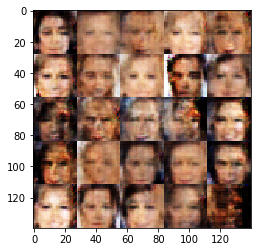

Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 2.4508
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 1.0621
Epoch 1/1... Discriminator Loss: 0.5282... Generator Loss: 1.3264
Epoch 1/1... Discriminator Loss: 1.5705... Generator Loss: 0.4321
Epoch 1/1... Discriminator Loss: 0.8948... Generator Loss: 1.4788
Epoch 1/1... Discriminator Loss: 0.9004... Generator Loss: 1.2461
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.4566
Epoch 1/1... Discriminator Loss: 1.1170... Generator Loss: 0.7768
Epoch 1/1... Discriminator Loss: 1.0858... Generator Loss: 0.7454
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 1.9412


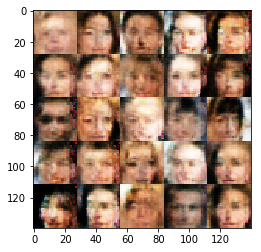

Epoch 1/1... Discriminator Loss: 0.9370... Generator Loss: 1.1325
Epoch 1/1... Discriminator Loss: 1.4413... Generator Loss: 1.9915
Epoch 1/1... Discriminator Loss: 1.0022... Generator Loss: 1.0462
Epoch 1/1... Discriminator Loss: 1.1232... Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 1.0784... Generator Loss: 0.7638
Epoch 1/1... Discriminator Loss: 0.9378... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 1.0085... Generator Loss: 0.7992
Epoch 1/1... Discriminator Loss: 1.1228... Generator Loss: 0.7360
Epoch 1/1... Discriminator Loss: 1.5988... Generator Loss: 0.3576
Epoch 1/1... Discriminator Loss: 1.1588... Generator Loss: 0.5640


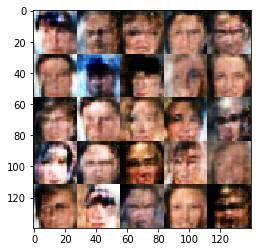

Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 1.0317
Epoch 1/1... Discriminator Loss: 1.0093... Generator Loss: 1.3503
Epoch 1/1... Discriminator Loss: 1.0389... Generator Loss: 1.9270
Epoch 1/1... Discriminator Loss: 0.9709... Generator Loss: 0.8234
Epoch 1/1... Discriminator Loss: 1.1176... Generator Loss: 0.5576
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.8675
Epoch 1/1... Discriminator Loss: 0.8418... Generator Loss: 1.2530
Epoch 1/1... Discriminator Loss: 1.4612... Generator Loss: 2.4636
Epoch 1/1... Discriminator Loss: 0.8047... Generator Loss: 0.8784
Epoch 1/1... Discriminator Loss: 1.0085... Generator Loss: 1.2217


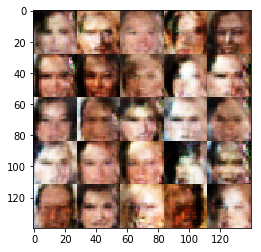

Epoch 1/1... Discriminator Loss: 1.1895... Generator Loss: 0.9186
Epoch 1/1... Discriminator Loss: 1.2344... Generator Loss: 0.8149
Epoch 1/1... Discriminator Loss: 1.6590... Generator Loss: 0.3078
Epoch 1/1... Discriminator Loss: 0.9137... Generator Loss: 1.0641
Epoch 1/1... Discriminator Loss: 1.8258... Generator Loss: 2.7675
Epoch 1/1... Discriminator Loss: 1.3991... Generator Loss: 1.1442
Epoch 1/1... Discriminator Loss: 1.2725... Generator Loss: 0.7065
Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 1.2964
Epoch 1/1... Discriminator Loss: 1.0914... Generator Loss: 1.0954
Epoch 1/1... Discriminator Loss: 1.1888... Generator Loss: 0.6766


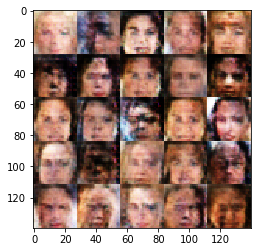

Epoch 1/1... Discriminator Loss: 1.1755... Generator Loss: 0.7273
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.5256
Epoch 1/1... Discriminator Loss: 1.1320... Generator Loss: 1.0704
Epoch 1/1... Discriminator Loss: 1.0163... Generator Loss: 0.8851
Epoch 1/1... Discriminator Loss: 1.0420... Generator Loss: 1.0488
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 1.8505
Epoch 1/1... Discriminator Loss: 1.1176... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 1.7989
Epoch 1/1... Discriminator Loss: 1.4961... Generator Loss: 0.4238
Epoch 1/1... Discriminator Loss: 1.0364... Generator Loss: 1.1277


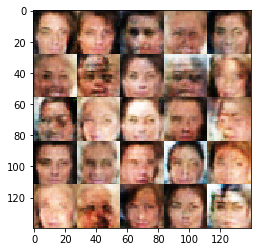

Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 0.6087
Epoch 1/1... Discriminator Loss: 1.0034... Generator Loss: 1.1299
Epoch 1/1... Discriminator Loss: 0.8910... Generator Loss: 0.9343
Epoch 1/1... Discriminator Loss: 1.5975... Generator Loss: 0.3803
Epoch 1/1... Discriminator Loss: 0.9882... Generator Loss: 1.1787
Epoch 1/1... Discriminator Loss: 1.1573... Generator Loss: 0.7148
Epoch 1/1... Discriminator Loss: 0.9845... Generator Loss: 0.8479
Epoch 1/1... Discriminator Loss: 1.2808... Generator Loss: 1.1827
Epoch 1/1... Discriminator Loss: 1.3769... Generator Loss: 0.5665
Epoch 1/1... Discriminator Loss: 1.0778... Generator Loss: 0.8242


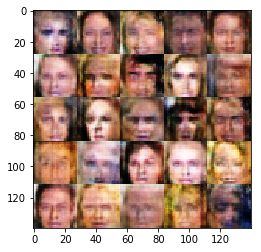

Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 0.6954
Epoch 1/1... Discriminator Loss: 1.4507... Generator Loss: 0.4737
Epoch 1/1... Discriminator Loss: 0.9601... Generator Loss: 1.2013
Epoch 1/1... Discriminator Loss: 0.9195... Generator Loss: 1.2741
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 0.5573
Epoch 1/1... Discriminator Loss: 0.9221... Generator Loss: 0.9819
Epoch 1/1... Discriminator Loss: 1.2466... Generator Loss: 0.5360
Epoch 1/1... Discriminator Loss: 0.7744... Generator Loss: 2.4933
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.4236
Epoch 1/1... Discriminator Loss: 0.8897... Generator Loss: 0.9036


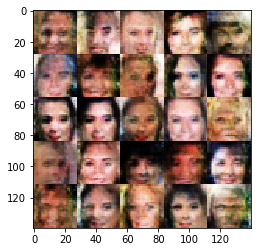

Epoch 1/1... Discriminator Loss: 1.2154... Generator Loss: 1.3561
Epoch 1/1... Discriminator Loss: 1.0373... Generator Loss: 0.7478
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.6246
Epoch 1/1... Discriminator Loss: 1.0064... Generator Loss: 1.5544
Epoch 1/1... Discriminator Loss: 1.1074... Generator Loss: 0.9617
Epoch 1/1... Discriminator Loss: 1.0670... Generator Loss: 0.8752
Epoch 1/1... Discriminator Loss: 1.0353... Generator Loss: 1.0350
Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 2.1777
Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 1.2784
Epoch 1/1... Discriminator Loss: 0.9169... Generator Loss: 0.7467


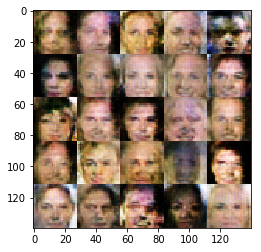

Epoch 1/1... Discriminator Loss: 1.0662... Generator Loss: 0.7253
Epoch 1/1... Discriminator Loss: 1.0883... Generator Loss: 0.9275
Epoch 1/1... Discriminator Loss: 1.4436... Generator Loss: 0.4383
Epoch 1/1... Discriminator Loss: 1.6687... Generator Loss: 1.8877
Epoch 1/1... Discriminator Loss: 0.9642... Generator Loss: 1.3903
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 1.0498
Epoch 1/1... Discriminator Loss: 1.2269... Generator Loss: 0.6845
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.5249
Epoch 1/1... Discriminator Loss: 1.1384... Generator Loss: 1.3584
Epoch 1/1... Discriminator Loss: 1.1423... Generator Loss: 0.8941


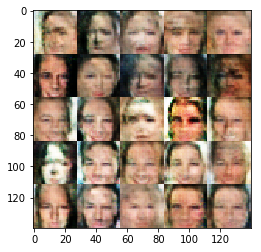

Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.4683
Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 0.5802
Epoch 1/1... Discriminator Loss: 1.0626... Generator Loss: 1.6920
Epoch 1/1... Discriminator Loss: 2.6332... Generator Loss: 3.8714
Epoch 1/1... Discriminator Loss: 1.1216... Generator Loss: 1.1224
Epoch 1/1... Discriminator Loss: 1.8383... Generator Loss: 0.2429
Epoch 1/1... Discriminator Loss: 1.0367... Generator Loss: 1.1430
Epoch 1/1... Discriminator Loss: 1.1567... Generator Loss: 0.6762
Epoch 1/1... Discriminator Loss: 1.0525... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.7043


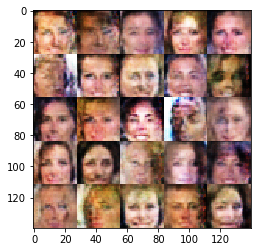

Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 0.8443
Epoch 1/1... Discriminator Loss: 1.1083... Generator Loss: 1.4398
Epoch 1/1... Discriminator Loss: 1.0655... Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 0.9544... Generator Loss: 0.9790
Epoch 1/1... Discriminator Loss: 0.8803... Generator Loss: 1.0427
Epoch 1/1... Discriminator Loss: 1.2203... Generator Loss: 1.2814
Epoch 1/1... Discriminator Loss: 1.4445... Generator Loss: 0.5711
Epoch 1/1... Discriminator Loss: 1.2002... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 1.0852... Generator Loss: 1.3372
Epoch 1/1... Discriminator Loss: 0.9456... Generator Loss: 0.9071


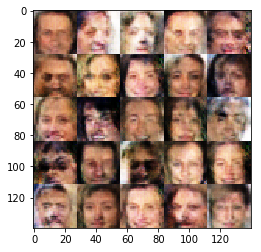

Epoch 1/1... Discriminator Loss: 0.8643... Generator Loss: 1.4871
Epoch 1/1... Discriminator Loss: 0.8651... Generator Loss: 1.6074
Epoch 1/1... Discriminator Loss: 1.0620... Generator Loss: 0.6828
Epoch 1/1... Discriminator Loss: 1.5242... Generator Loss: 0.4228
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 1.6317
Epoch 1/1... Discriminator Loss: 0.9704... Generator Loss: 1.0578
Epoch 1/1... Discriminator Loss: 1.2805... Generator Loss: 0.9840
Epoch 1/1... Discriminator Loss: 1.0381... Generator Loss: 1.1534
Epoch 1/1... Discriminator Loss: 0.9917... Generator Loss: 0.8837
Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 0.8706


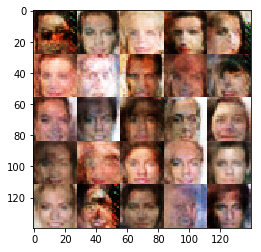

Epoch 1/1... Discriminator Loss: 1.1715... Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.1361... Generator Loss: 0.6458
Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 0.5044
Epoch 1/1... Discriminator Loss: 1.0345... Generator Loss: 1.1051
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 1.4303
Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 0.5458
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 0.5866
Epoch 1/1... Discriminator Loss: 1.1987... Generator Loss: 0.6275
Epoch 1/1... Discriminator Loss: 0.9070... Generator Loss: 0.8690
Epoch 1/1... Discriminator Loss: 1.1965... Generator Loss: 0.4919


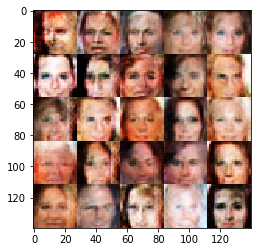

Epoch 1/1... Discriminator Loss: 1.2284... Generator Loss: 0.7094
Epoch 1/1... Discriminator Loss: 1.2197... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 1.0952... Generator Loss: 0.9778
Epoch 1/1... Discriminator Loss: 1.0707... Generator Loss: 0.9027
Epoch 1/1... Discriminator Loss: 0.9873... Generator Loss: 0.8520
Epoch 1/1... Discriminator Loss: 0.9981... Generator Loss: 1.1091
Epoch 1/1... Discriminator Loss: 1.5103... Generator Loss: 0.3486
Epoch 1/1... Discriminator Loss: 1.0296... Generator Loss: 0.8319
Epoch 1/1... Discriminator Loss: 1.0154... Generator Loss: 1.3955
Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 0.5364


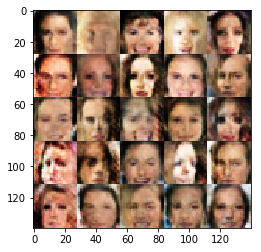

Epoch 1/1... Discriminator Loss: 1.1056... Generator Loss: 0.7052
Epoch 1/1... Discriminator Loss: 1.0147... Generator Loss: 1.2823
Epoch 1/1... Discriminator Loss: 1.1722... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 0.8903... Generator Loss: 1.5975
Epoch 1/1... Discriminator Loss: 2.3700... Generator Loss: 4.0204
Epoch 1/1... Discriminator Loss: 0.9370... Generator Loss: 1.0914
Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 1.2124
Epoch 1/1... Discriminator Loss: 1.7635... Generator Loss: 0.2569
Epoch 1/1... Discriminator Loss: 1.0979... Generator Loss: 0.8069
Epoch 1/1... Discriminator Loss: 1.6818... Generator Loss: 0.3463


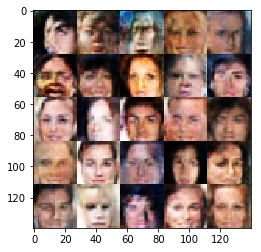

Epoch 1/1... Discriminator Loss: 1.1202... Generator Loss: 0.6709
Epoch 1/1... Discriminator Loss: 1.0433... Generator Loss: 1.0810
Epoch 1/1... Discriminator Loss: 0.9319... Generator Loss: 1.0491
Epoch 1/1... Discriminator Loss: 1.0039... Generator Loss: 0.8827
Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 0.8510
Epoch 1/1... Discriminator Loss: 0.8955... Generator Loss: 0.7976
Epoch 1/1... Discriminator Loss: 1.1356... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.1226... Generator Loss: 0.8770
Epoch 1/1... Discriminator Loss: 1.2264... Generator Loss: 1.0286
Epoch 1/1... Discriminator Loss: 1.7809... Generator Loss: 0.2353


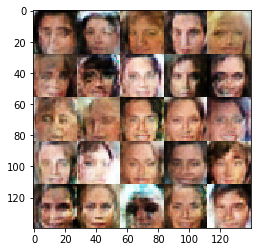

Epoch 1/1... Discriminator Loss: 1.0825... Generator Loss: 0.8562
Epoch 1/1... Discriminator Loss: 1.1062... Generator Loss: 0.6432
Epoch 1/1... Discriminator Loss: 1.1928... Generator Loss: 1.1150
Epoch 1/1... Discriminator Loss: 1.0121... Generator Loss: 1.0104
Epoch 1/1... Discriminator Loss: 1.2160... Generator Loss: 0.8365
Epoch 1/1... Discriminator Loss: 1.2245... Generator Loss: 0.7572


In [28]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.